## Scikit learns implementation of regularised logistic regression

Functions learnt in this implementation:
1) Sklearn-StandardScaler(): 
- fit(data) calculates the mean and std for each feature and stores it as aclass variable
- transform(data) returns a scaled data, using the values of the class attributes mean and std_dev
- fit_transform(data) does both the tasks simultaneously

2) sklearn-PolynomialFeatures(degree=, include_bias=):
- fit_transform() calculates and returns an array with all terms of the polynomial of the given degree
- get_feature_names_out() returns an array with the names of all polynomial features

3) X,Y=np.meshgrid(x,y): x.shape=(n,1), y.shape=(m,1)
- return two 2-D arrays. 
- X is a matrix with 'm' row vectors, each row vector is x.
- Y is a matrix with 'n' col vectors, each col vector is y.
- when the two amtices are placed on top of each other the give out the coordinates of point in the x-y plane. thse coordinates can be used as inputs to plot z=f(x,y)

4) plt.contour(X,Y,Z,level=,color=) and plt.contourf():
- plot the contours of a function Z=f(X,Y). Z is a matrix where each elementat (i,j) represents the output of f(X[i][j], y[i][j])
- levels functions is the number of conoturs we wish to see in the plot.

In [35]:
%load_ext autoreload
%autoreload 2
#used to reload the imported modules in realtime

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
import utility_functions
np.printoptions(precision=2)

In [2]:
data=np.loadtxt("D:\Development\data_science\ML_algorithms\coursera-1\ex2data2.txt", delimiter=',')
print(data.shape)
data[0:5]
#the last column of this dataset is the target column

(118, 3)


array([[ 0.051267,  0.69956 ,  1.      ],
       [-0.092742,  0.68494 ,  1.      ],
       [-0.21371 ,  0.69225 ,  1.      ],
       [-0.375   ,  0.50219 ,  1.      ],
       [-0.51325 ,  0.46564 ,  1.      ]])

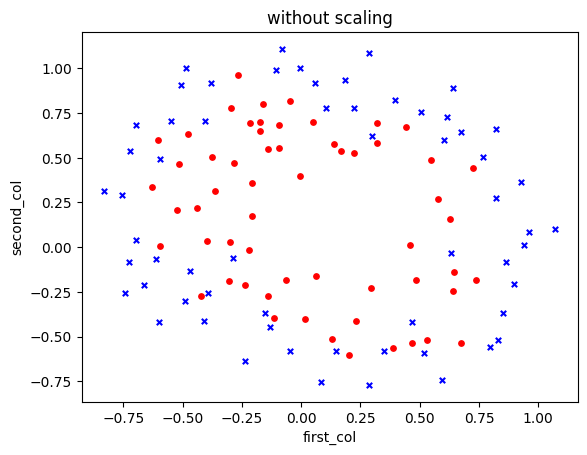

In [3]:
#visualising the data given
for i in range(data.shape[0]):
    if(data[i][2]==0):
        plt.scatter(data[i][0],data[i][1], c='b', s=15, marker='x')
    if(data[i][2]==1):
        plt.scatter(data[i][0],data[i][1], c='r', s=15, marker='o')
plt.xlabel('first_col')
plt.ylabel('second_col')
plt.title("without scaling")
plt.show()

clearly, this data can not be fit by a linear desicion boundry we would require a much more complex model, thus we will have to increase the number of polynomial features in the datset.

In [4]:
scaler=StandardScaler()
scaler.fit(data[:,0:2]) 
"""
the standard scaler is a scaling class with attributes like mean and std_dev.
the scaler.fit returns a standardscaler object, calculates the mean and std_dev of the data column wise for future use
"""
scaled_data=scaler.transform(data[:,0:2])#uses the values of self.mean and self.std_dev to scale the data, returns a numpy array
scaled_data[0:10]

array([[-0.00710129,  0.99791805],
       [-0.29829632,  0.9696688 ],
       [-0.54290103,  0.98379343],
       [-0.8690393 ,  0.61655322],
       [-1.14858928,  0.5459301 ],
       [-1.17188342,  0.05158761],
       [-0.91562759, -0.28740915],
       [-0.72927442, -0.72526668],
       [-0.07698778, -1.13488075],
       [ 0.1559638 , -1.3467501 ]])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


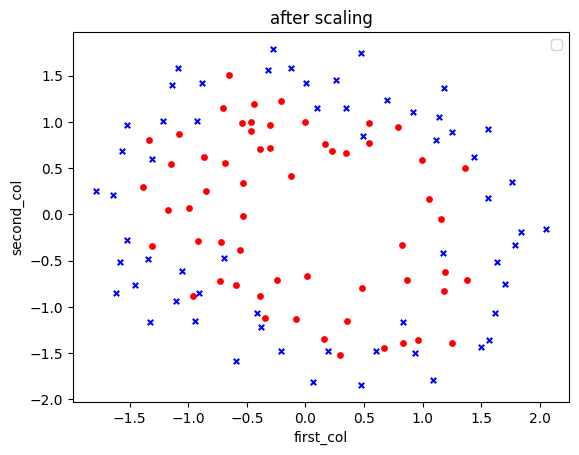

In [5]:
#visualising the scaled data
for i in range(scaled_data.shape[0]):
    if(data[i][2]==0):
        plt.scatter(scaled_data[i][0], scaled_data[i][1], c='b', s=15, marker='x')
    if(data[i][2]==1):
        plt.scatter(scaled_data[i][0], scaled_data[i][1], c='r', s=15, marker='o')
plt.xlabel('first_col')
plt.ylabel('second_col')
plt.title("after scaling")
plt.legend()
plt.show()

In [43]:
#creating polynomial features of degree 6
degree=6
poly= PolynomialFeatures(degree=degree, include_bias=False) #include_bias when true includes the constant term aswell
X_train=poly.fit_transform(scaled_data)
X_train1=poly.fit_transform(data[:, 0:2])
print(X_train[1])
print(X_train1[1])
#features corresponding to all possible 6 degree terms have been added to the array

[-2.98296321e-01  9.69668805e-01  8.89806949e-02 -2.89248637e-01
  9.40257591e-01 -2.65426139e-02  8.62818041e-02 -2.80475380e-01
  9.11738454e-01  7.91756407e-03 -2.57375447e-02  8.36647738e-02
 -2.71968226e-01  8.84084337e-01 -2.36178023e-03  7.67741488e-03
 -2.49568942e-02  8.11271212e-02 -2.63719105e-01  8.57269003e-01
  7.04510353e-04 -2.29014461e-03  7.44454971e-03 -2.41999218e-02
  7.86664387e-02 -2.55720189e-01  8.31267009e-01]
[-9.27420000e-02  6.84940000e-01  8.60107856e-03 -6.35227055e-02
  4.69142804e-01 -7.97681228e-04  5.89122275e-03 -4.35092419e-02
  3.21334672e-01  7.39785525e-05 -5.46363780e-04  4.03513411e-03
 -2.98012201e-02  2.20094970e-01 -6.86091891e-06  5.06708697e-05
 -3.74226408e-04  2.76382476e-03 -2.04120477e-02  1.50751849e-01
  6.36295342e-07 -4.69931780e-06  3.47065055e-05 -2.56322636e-04
  1.89305413e-03 -1.39810280e-02  1.03255971e-01]


In [44]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2', 'x0^3', 'x0^2 x1', 'x0 x1^2',
       'x1^3', 'x0^4', 'x0^3 x1', 'x0^2 x1^2', 'x0 x1^3', 'x1^4', 'x0^5',
       'x0^4 x1', 'x0^3 x1^2', 'x0^2 x1^3', 'x0 x1^4', 'x1^5', 'x0^6',
       'x0^5 x1', 'x0^4 x1^2', 'x0^3 x1^3', 'x0^2 x1^4', 'x0 x1^5',
       'x1^6'], dtype=object)

In [45]:
"""
logistic regression object has the provision of regularisation aswell, penalty defines the type of penalty we want
to place on the coeffs of the input parameters
'C' parameter is the inverse of the regulaisation parameter greater 'C' implies lesser regularisation
"""

#training the scaled dataset
penalty ='l2' 
lambda_inv=4
alg=LogisticRegression(penalty = penalty, C=lambda_inv)
alg.fit(X_train, data[:,2])
print("coefficient matrix: ", alg.coef_)
print("intercept: ", alg.intercept_)

#training the original dataset
alg1=LogisticRegression(penalty=penalty, C=lambda_inv)
alg1.fit(X_train1, data[:,2])
print("coefficient matrix: ", alg1.coef_)
print("intercept: ", alg1.intercept_)

#regularised decision boundry is ready to be visualised

coefficient matrix:  [[-0.12880852  0.75305863 -0.44545485 -0.36127318 -0.38827111  0.21526724
   0.70102081  0.20543895 -0.83828117  0.70218961  0.23275886 -0.81203027
  -0.76526893 -0.35403653 -0.15933297 -0.14821021  1.22168095 -0.74903711
  -0.93753432  0.03156635 -0.59760423 -0.34481688 -0.26211418  0.13419032
  -1.35437435 -1.10564638 -0.32638623]]
intercept:  [3.09321777]
coefficient matrix:  [[ 1.3588033   2.20869876 -3.38894296 -2.22275229 -2.96620381  0.43711291
  -0.80413122 -0.59532098 -0.2470318  -2.5411579   0.09855231 -1.2383273
  -0.75647113 -2.10017667 -0.41748185 -0.38513319  0.13444383 -0.66655369
  -0.7371788  -0.40717517 -1.90626811  0.19073598 -0.55694732  0.13762439
  -0.70566513 -0.50104554 -1.25776762]]
intercept:  [2.15595726]


note that feature scaling does not always lead to better and more accurate results, sometimes it might degrade the preditions aswell. for example in the above case the original datapoints aldready lied in a small range of values here feature scaling was not required, infact scaling led to worse results.
Here's the comparison.

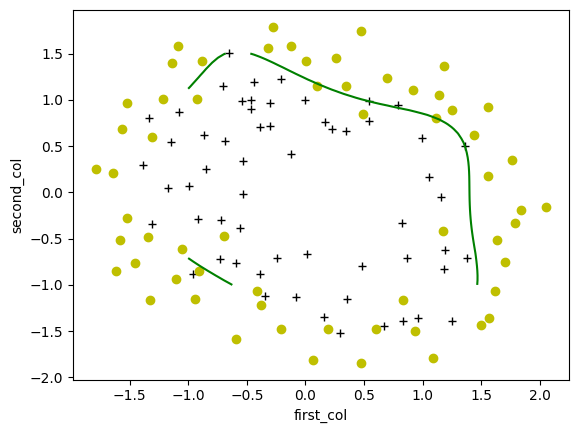

In [39]:
#plotting using the utility_function module
plt.xlabel('first_col')
plt.ylabel('second_col')

utility_functions.plot_decision_boundary(alg.coef_[0],alg.intercept_[0],X_train,data[:,2])
plt.show()

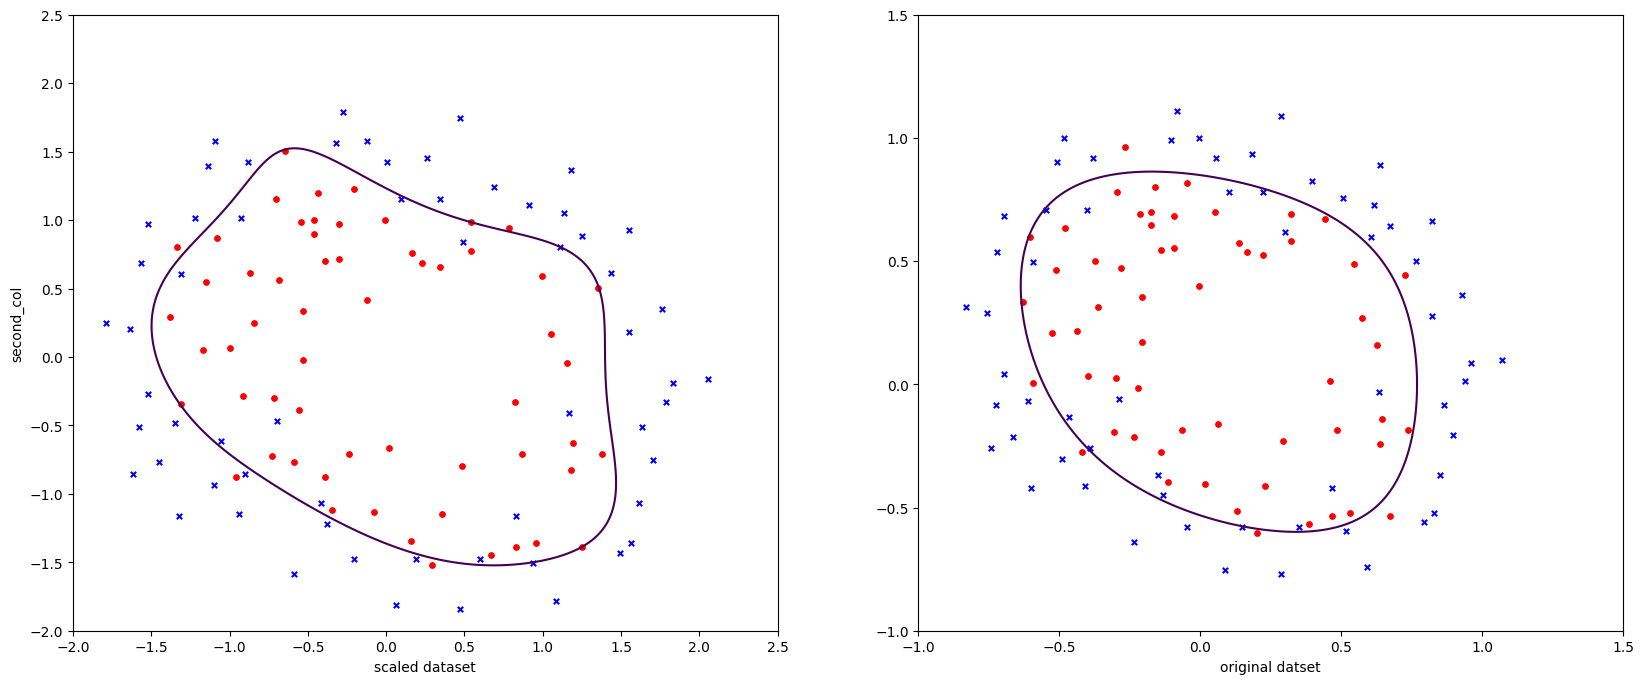

In [53]:
fig,ax=plt.subplots(1,2, figsize=(20,8))
ax[0].set_xlabel('scaled dataset')
ax[1].set_xlabel('original datset')
ax[0].set_ylabel('second_col')
ax[0].axis([-2,2.5,-2,2.5])
ax[1].axis([-1,1.5,-1,1.5])

x=np.linspace(-2,2,1000)
y=np.linspace(-2,2,1000)

#creating a meshgrid for the x,y input to make 3D-plots
X,Y=np.meshgrid(x,y) #X,Y are two 2-D arrays which when overlapped serve as the input points for plotting z=f(x,y)

Z=np.zeros(X.shape)
Z1=np.zeros(X.shape)
count=0
for i in range(0,degree+1):
    for j in range(i+1):
        if(i==0 and j==0):
            continue
        Z=Z+(Y**(j))*(X**(i-j))*(alg.coef_[0][count])
        Z1=Z1+(Y**(j))*(X**(i-j))*(alg1.coef_[0][count])
        count=count+1
Z=Z+alg.intercept_[0]
Z1=Z1+alg1.intercept_[0]
ax[0].contour(X,Y,Z,[0])
ax[1].contour(X,Y,Z1,[0])


for i in range(scaled_data.shape[0]):
    if(data[i][2]==0):
        ax[0].scatter(X_train[i][0], X_train[i][1], c='b', s=15, marker='x')
        ax[1].scatter(X_train1[i][0], X_train1[i][1], c='b', s=15, marker='x')
    if(data[i][2]==1):
        ax[0].scatter(X_train[i][0], X_train[i][1], c='r', s=15, marker='o')
        ax[1].scatter(X_train1[i][0], X_train1[i][1], c='r', s=15, marker='o')
plt.show()